In [11]:
import torch
from torchvision.transforms import ToTensor
from torchvision import datasets


training_data = datasets.MNIST(root="data", download=True, train=True, transform=ToTensor())
test_data = datasets.MNIST(root="data", download=True, train=False, transform=ToTensor())

print(training_data, test_data)


Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


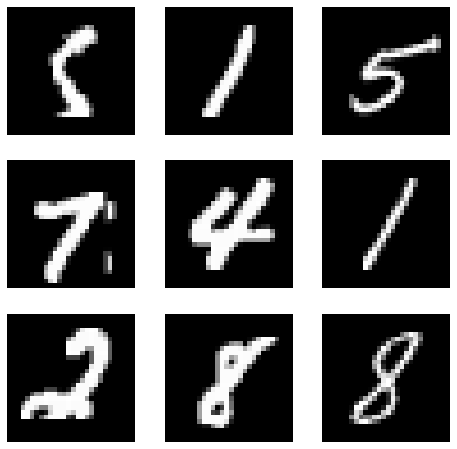

In [24]:
# Some Visualization Stuff First
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# plot random images
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


train_data_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=64, shuffle=True)

# calculate mean and std of the dataset (gray scale)
std = []
mean = []
for image, _ in train_data_loader:
    image.mean()
    image.std()

In [20]:
# Copy and Paste from : https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118
import torch.nn as nn

class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()        
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)    

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)        
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization


In [30]:
from torch.autograd import Variable
from torch import optim

cnn = CNN()
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
loss_func = nn.CrossEntropyLoss()   

def train(num_epochs, cnn, loaders):
    
    # cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y

            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()                # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))               


In [31]:
num_epochs = 10
train(num_epochs, cnn, {'train': train_data_loader, 'test': test_data_loader} )

Epoch [1/10], Step [100/938], Loss: 0.0512
Epoch [1/10], Step [200/938], Loss: 0.0749
Epoch [1/10], Step [300/938], Loss: 0.1291
Epoch [1/10], Step [400/938], Loss: 0.0214
Epoch [1/10], Step [500/938], Loss: 0.0183
Epoch [1/10], Step [600/938], Loss: 0.0152
Epoch [1/10], Step [700/938], Loss: 0.0164
Epoch [1/10], Step [800/938], Loss: 0.1643
Epoch [1/10], Step [900/938], Loss: 0.0828
Epoch [2/10], Step [100/938], Loss: 0.0277
Epoch [2/10], Step [200/938], Loss: 0.0443
Epoch [2/10], Step [300/938], Loss: 0.0066
Epoch [2/10], Step [400/938], Loss: 0.0202
Epoch [2/10], Step [500/938], Loss: 0.2156
Epoch [2/10], Step [600/938], Loss: 0.0079
Epoch [2/10], Step [700/938], Loss: 0.1957
Epoch [2/10], Step [800/938], Loss: 0.0029
Epoch [2/10], Step [900/938], Loss: 0.0662
Epoch [3/10], Step [100/938], Loss: 0.0927
Epoch [3/10], Step [200/938], Loss: 0.0815
Epoch [3/10], Step [300/938], Loss: 0.0267
Epoch [3/10], Step [400/938], Loss: 0.0120
Epoch [3/10], Step [500/938], Loss: 0.0047
Epoch [3/10

In [3]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
from torch.utils.tensorboard import SummaryWriter


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
